In [115]:
import numpy as np
import matplotlib.pyplot as plt

from tests import *
%matplotlib inline
%autocall 2

res = {}

Automatic calling is: Full


In [11]:
run_test('loop', repeat=6)

Building...
Running test loop for 6 times... Duration: 0.682s


[0.975634, 0.882334, 1.075745, 0.881607, 0.919391, 0.906037]

In [145]:
sorted(get_all_tests())

[u'call0',
 u'call1',
 u'call2',
 u'call3',
 u'call4',
 u'call5',
 u'call6',
 u'call7',
 u'create_process',
 u'create_thread',
 u'getpid',
 u'getppid',
 u'getuid',
 u'loop',
 u'mem_bandwidth_memcpy',
 u'mem_bandwidth_memset',
 u'mem_bandwidth_r',
 u'mem_bandwidth_rw',
 u'mem_bandwidth_w',
 u'mem_latency_128k',
 u'mem_latency_128m',
 u'mem_latency_16k',
 u'mem_latency_16m',
 u'mem_latency_1k',
 u'mem_latency_1m',
 u'mem_latency_256k',
 u'mem_latency_2k',
 u'mem_latency_2m',
 u'mem_latency_32k',
 u'mem_latency_32m',
 u'mem_latency_4k',
 u'mem_latency_4m',
 u'mem_latency_512k',
 u'mem_latency_64k',
 u'mem_latency_64m',
 u'mem_latency_8k',
 u'mem_latency_8m',
 u'mem_pagefault',
 u'nanosleep',
 u'rdtsc',
 u'switch_process',
 u'switch_thread']

In [148]:
run_tests('switch_process', 'switch_thread')

Running test switch_process for 10 times... Duration: 1.876s
Running test switch_thread for 10 times... Duration: 1.573s


{'switch_process': [17439.0496,
  15529.1968,
  15094.3316,
  14993.8296,
  24021.1664,
  14110.9686,
  15846.2336,
  13632.5838,
  16043.587,
  16313.5664],
 'switch_thread': [14225.3306,
  14528.4934,
  13549.5506,
  12566.9082,
  13298.9428,
  12866.7096,
  13099.3726,
  12107.0312,
  11599.7584,
  13189.1432]}

In [147]:
run_tests('switch_process', 'switch_thread')

Running test switch_process for 10 times... Duration: 1.348s
Running test switch_thread for 10 times... Duration: 1.035s


{'switch_process': [11771.3596,
  15876.8322,
  9066.3418,
  35321.9018,
  8519.5402,
  8444.7824,
  8324.239,
  8217.0782,
  10013.7352,
  10355.0992],
 'switch_thread': [10871.1492,
  5805.7502,
  8585.1482,
  7990.077,
  7934.9152,
  8219.8274,
  8333.05,
  8293.1254,
  8177.9902,
  8640.4226]}

In [275]:
def plot_results(tests, res, violin=True, ticks=None, initialize=True):
    res = [[x/2592.0 for x in sorted(res[t])[2:-2]] for t in tests]
    x = range(1, len(tests) + 1)
    y = [np.median(r) for r in res]
    if initialize:
        plt.figure(figsize=(10, 8))
    plt.plot(x, y, 'o-')
    if violin:
        plt.violinplot(res)
    if not initialize:
        return
    plt.ylim(ymin=0)
    if ticks is None:
        ticks = tests
    plt.xticks(x, ticks)

In [43]:
call_tests = ['call0', 'call1', 'call2', 'call3', 'call4', 'call5', 'call6', 'call7']
call_res = run_tests(*call_tests)

Running test call0 for 10 times...
Running test call1 for 10 times...
Running test call2 for 10 times...
Running test call3 for 10 times...
Running test call4 for 10 times...
Running test call5 for 10 times...
Running test call6 for 10 times...
Running test call7 for 10 times...


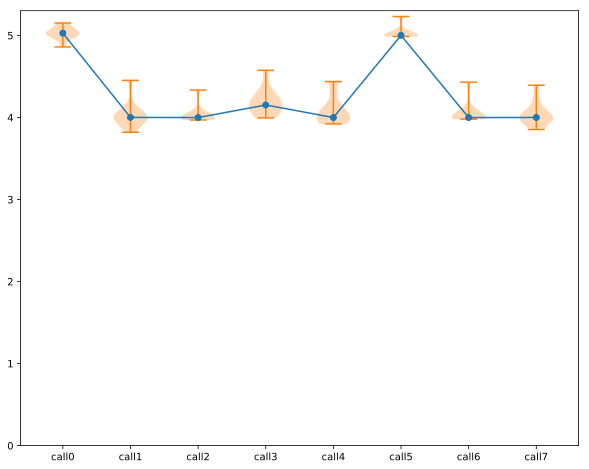

In [44]:
plot_results(call_tests, call_res)

In [25]:
short_name = '1k 2k 4k 8k 16k 32k 64k 128k 256k 512k 1m 2m 4m 8m 16m 32m 64m 128m'.split()
tests = ['mem_latency_' + t for t in short_name]
res = run_tests(*tests, repeat=10)
res = { k[12:]: v for k, v in res.items() }

Building...
Running test mem_latency_1k for 10 times... Duration: 1.994s
Running test mem_latency_2k for 10 times... Duration: 1.976s
Running test mem_latency_4k for 10 times... Duration: 1.962s
Running test mem_latency_8k for 10 times... Duration: 1.968s
Running test mem_latency_16k for 10 times... Duration: 1.038s
Running test mem_latency_32k for 10 times... Duration: 1.028s
Running test mem_latency_64k for 10 times... Duration: 1.503s
Running test mem_latency_128k for 10 times... Duration: 1.500s
Running test mem_latency_256k for 10 times... Duration: 1.496s
Running test mem_latency_512k for 10 times... Duration: 2.218s
Running test mem_latency_1m for 10 times... Duration: 2.231s
Running test mem_latency_2m for 10 times... Duration: 2.250s
Running test mem_latency_4m for 10 times... Duration: 2.797s
Running test mem_latency_8m for 10 times... Duration: 4.069s
Running test mem_latency_16m for 10 times... Duration: 5.763s
Running test mem_latency_32m for 10 times... Duration: 3.719s
R

In [28]:
res['16m'] = run_test('mem_latency_16m')

Running test mem_latency_16m for 10 times... Duration: 5.918s


In [32]:
print str(res)

{'8k': [4.024834, 4.0812, 4.002018, 4.083852, 3.987566, 4.001593, 4.010643, 4.101335, 4.036702, 4.17659], '8m': [177.762379, 185.030809, 190.175223, 180.807967, 181.038974, 164.544639, 186.733207, 167.711807, 191.327661, 201.004725], '512k': [44.75164, 46.291455, 45.924867, 47.111539, 45.861966, 44.627902, 46.425165, 46.728038, 46.193512, 46.255277], '32k': [4.012983, 3.989146, 4.013968, 3.997657, 4.004675, 3.889794, 3.862342, 3.963703, 3.999875, 3.993861], '64k': [11.854213, 12.344366, 12.01834, 12.285375, 11.752917, 12.035994, 12.012754, 11.851809, 11.908975, 12.460326], '16k': [4.008439, 4.105368, 4.075939, 3.987651, 4.252475, 3.997365, 4.141047, 3.90305, 4.000342, 3.993537], '64m': [345.804536, 333.719272, 332.352244, 323.422594, 334.19578, 335.866688, 351.164948, 336.094384, 349.582638, 326.431054], '16m': [302.30263, 252.811942, 256.226356, 230.202157, 257.428033, 245.697171, 245.937331, 241.725356, 239.394865, 247.052319], '32m': [265.010036, 290.405518, 284.271762, 292.555402, 

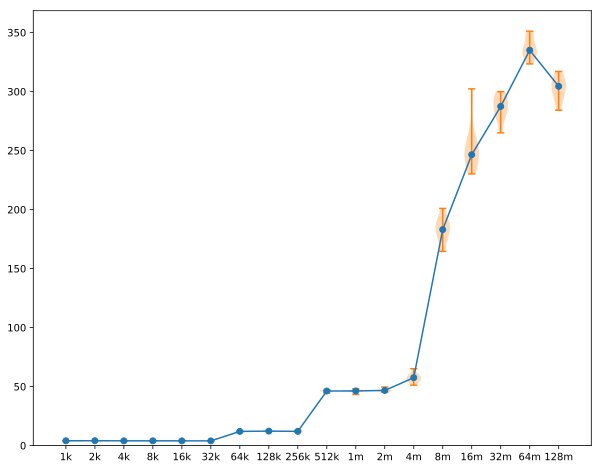

In [29]:
plot_results(short_name, res, violin=True)
plt.show()

In [66]:
run_test('loop')

Running test loop for 10 times... Duration: 1.263s


[1.011991,
 0.997956,
 1.008042,
 0.999676,
 0.999908,
 1.025867,
 1.000044,
 0.999673,
 0.999668,
 0.973336]

Building...
Running test mem_bandwidth_memcpy for 10 times... Duration: 3.671s


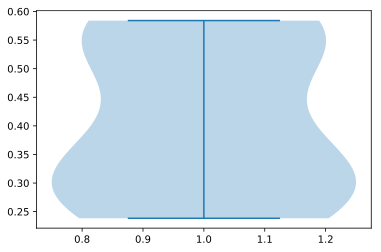

[0.560989,
 0.553963,
 0.407432,
 0.238412,
 0.555662,
 0.302162,
 0.584081,
 0.292494,
 0.294033,
 0.30261]

In [54]:
res = run_test('mem_bandwidth_memcpy')
plt.violinplot(res)
plt.show()
res

In [55]:
2.592 / np.median(res)

7.3009765619498559

In [ ]:
res = {
    t: [2.592 / r for r in run_test(t)]
    for t in ['mem_bandwidth_memset', 'mem_bandwidth_memcpy', 'mem_bandwidth_r', 'mem_bandwidth_w', 'mem_bandwidth_rw']
}

Building...
Running test mem_bandwidth_memset for 10 times... Duration: 4.141s
Running test mem_bandwidth_memcpy for 10 times... Duration: 8.931s
Running test mem_bandwidth_r for 10 times...

In [114]:
t = 'mem_bandwidth_memset'
res[t] = [2.592 / r for r in run_test(t)]

Running test mem_bandwidth_memset for 10 times... Duration: 1.237s


In [118]:
print str(res)

{'mem_bandwidth_r': [10.31305205863161, 11.24277807658275, 11.648600550072805, 11.074651353568498, 11.062126301144197, 10.533502389544523, 10.391526415805384, 10.520846863228991, 11.057643083853794, 10.839156452685325], 'mem_bandwidth_memcpy': [11.34920704421462, 7.835929186417722, 9.684578653574551, 8.514692114383326, 8.281388282730173, 10.14477438444468, 8.606091997529733, 7.844395282467837, 9.851655055244525, 8.467157099737362], 'mem_bandwidth_w': [12.832953757797803, 10.919385279050957, 10.383866548085475, 10.985704174313287, 11.555642738045348, 10.648218518533735, 11.131056162018705, 12.046680888442717, 11.895856184973221, 11.74652521288311], 'mem_bandwidth_memset': [19.48095871569976, 17.59256117012251, 23.719321363860978, 23.33453366942744, 18.06183670482973, 23.455739959821187, 20.436321777455394, 22.845055526176626, 20.92381213774843, 24.009114571272427], 'mem_bandwidth_rw': [7.037702754804481, 7.913730566784315, 7.9309469097763, 8.565027459636648, 8.598612014171787, 8.6522284

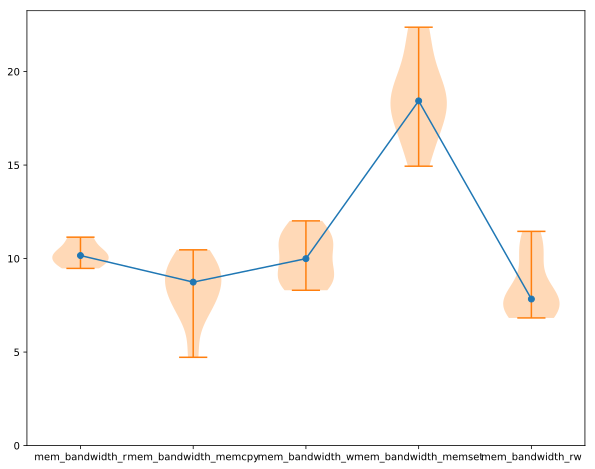

In [120]:
plot_results(res.keys(), res)
plt.show()

In [128]:
run_test('mem_pagefault', repeat=10)

Running test mem_pagefault for 10 times... Duration: 3.293s


[5132.627686,
 3252.84314,
 5131.808533,
 5489.561401,
 6136.565125,
 3588.163879,
 5210.129578,
 5276.19519,
 5257.848511,
 4474.83374]

In [23]:
run_test('tcp_rtt')

Running test tcp_rtt for 10 times... Duration: 1.029s


[60688.128,
 59995.518,
 59117.63,
 56236.786,
 63463.488,
 65473.424,
 63717.002,
 57820.732,
 61040.468,
 58033.828]

In [20]:
run_test('tcp_bandwidth_64m')

Building...
Running test tcp_bandwidth_64m for 10 times... Duration: 2.028s


[21291996.0,
 23844605.5,
 25212327.0,
 24026660.0,
 23543751.0,
 23617880.0,
 20033873.5,
 24765471.0,
 19066187.5,
 19882426.0]

In [5]:
run_test('tcp_overhead')

Running test tcp_overhead for 10 times... Duration: 0.080s


[548084.0,
 489462.0,
 404180.0,
 359048.0,
 334348.0,
 349628.0,
 361928.0,
 334578.0,
 336616.0,
 372060.0]

In [429]:
short_name = '128k'.split()
tests = ['fs_remote_seq_' + t for t in short_name]
res.update(run_tests(*tests))
tests = ['fs_remote_rand_' + t for t in short_name]
res.update(run_tests(*tests))

Running test fs_remote_seq_128k for 10 times... Duration: 1.294s
Running test fs_remote_rand_128k for 10 times... Duration: 1.306s


In [438]:
for t in short_name:
    print '|', t, '|', return_result(res['fs_remote_seq_' + t], unit='ms'), '|', return_result(res['fs_remote_rand_' + t], unit='ms'), '|'

| 64k | median = 3.698 ms, std = 0.099 ms | median = 4.037 ms, std = 0.288 ms |
| 128k | median = 3.211 ms, std = 0.319 ms | median = 3.371 ms, std = 0.348 ms |
| 256k | median = 3.409 ms, std = 0.048 ms | median = 3.495 ms, std = 0.196 ms |
| 512k | median = 3.062 ms, std = 0.180 ms | median = 3.392 ms, std = 0.124 ms |
| 1m | median = 2.984 ms, std = 0.175 ms | median = 3.433 ms, std = 0.124 ms |
| 2m | median = 3.089 ms, std = 0.252 ms | median = 3.227 ms, std = 0.080 ms |
| 4m | median = 3.479 ms, std = 0.065 ms | median = 3.592 ms, std = 0.166 ms |
| 8m | median = 3.195 ms, std = 0.109 ms | median = 3.102 ms, std = 0.245 ms |


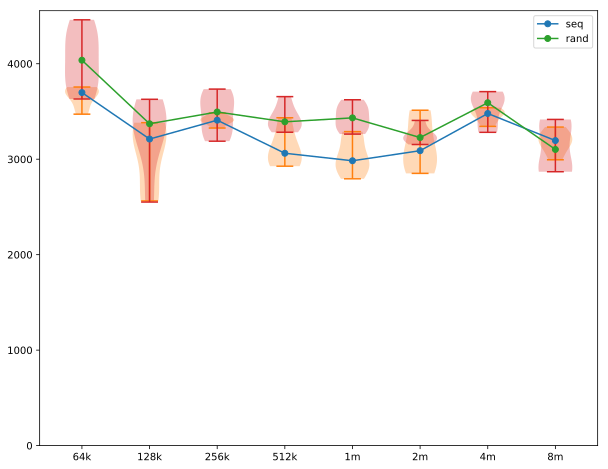

In [430]:
short_name = '64k 128k 256k 512k 1m 2m 4m 8m'.split()
tests1 = ['fs_remote_seq_' + t for t in short_name]
tests2 = ['fs_remote_rand_' + t for t in short_name]
plot_many_results([tests1, tests2], res, ticks=short_name)
plt.legend(['seq', 'rand'])
plt.savefig('fs_remote.svg')

In [335]:
run_test('fs_local_seq_64m')

Running test fs_local_seq_64m for 10 times... Duration: 4.036s


[64243.68042,
 62230.767334,
 59745.331299,
 63273.528198,
 60141.599365,
 65353.167236,
 62961.021973,
 61982.860229,
 61546.699341,
 61308.847412]

In [283]:
def plot_many_results(testss, ress, violin=True, ticks=None):
    plt.figure(figsize=(10, 8))
    for tests in testss:
        res = [[x/2592.0 for x in sorted(ress[t])[2:-2]] for t in tests]
        x = range(1, len(tests) + 1)
        y = [np.median(r) for r in res]
        plt.plot(x, y, 'o-')
        if violin:
            plt.violinplot(res)
    plt.ylim(ymin=0)
    if ticks is None:
        ticks = tests
    plt.xticks(x, ticks)

In [435]:
for t in short_name:
    print '|', t, '|', return_result(res['fs_local_seq_' + t], unit='µs'), '|', return_result(res['fs_local_rand_' + t], unit='µs'), '|'

| 64k |

KeyError: 'fs_local_seq_64k'

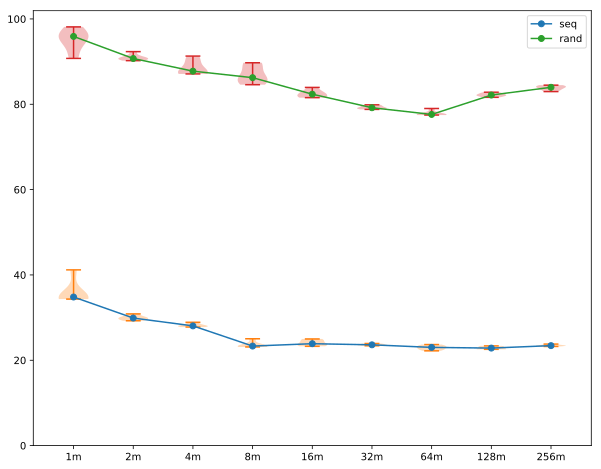

In [339]:
short_name = '1m 2m 4m 8m 16m 32m 64m 128m 256m'.split()
tests1 = ['fs_local_seq_' + t for t in short_name]
tests2 = ['fs_local_rand_' + t for t in short_name]
plot_many_results([tests1, tests2], res, ticks=short_name)
plt.legend(['seq', 'rand'])
plt.savefig('fs_local.svg')

In [252]:
def print_result(res, unit='ms'):
    res = np.array(sorted(res)[2:-2]) / 2.592e6
    if unit == 'µs':
        res *= 1000
    print 'median = {:,.3f} {unit}, std = {:,.3f} {unit}'.format(np.median(res), np.std(res), unit=unit)
for t in tests:
    print '|', t, '| 1 µs |',
    print_result(res2[t], unit='µs')

fs_cache_seq_64m | 1 µs | median = 1.105 µs, std = 0.116 µs
fs_cache_seq_128m | 1 µs | median = 1.321 µs, std = 0.013 µs
fs_cache_seq_256m | 1 µs | median = 1.145 µs, std = 0.129 µs
fs_cache_seq_512m | 1 µs | median = 1.146 µs, std = 0.115 µs
fs_cache_seq_1g | 1 µs | median = 1.052 µs, std = 0.082 µs
fs_cache_seq_2g | 1 µs | median = 1.115 µs, std = 0.100 µs
fs_cache_seq_4g | 1 µs | median = 1.249 µs, std = 0.028 µs
fs_cache_seq_8g | 1 µs | median = 2.356 µs, std = 0.069 µs
fs_cache_seq_16g | 1 µs | median = 2.256 µs, std = 0.061 µs


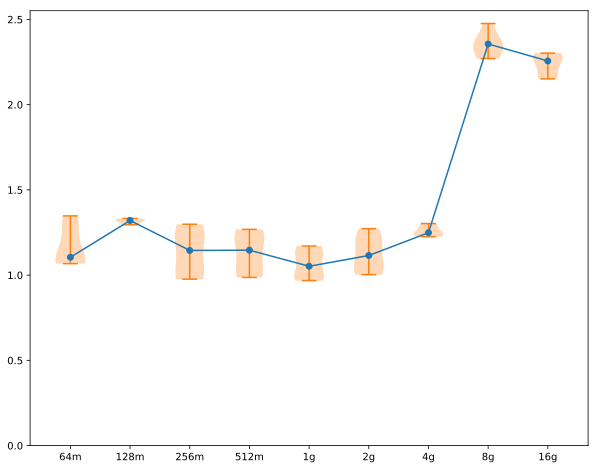

In [244]:
short_name = '64m 128m 256m 512m 1g 2g 4g 8g 16g'.split()
tests = ['fs_cache_seq_' + t for t in short_name]
plot_results(tests, res2, ticks=short_name)
plt.savefig('file_cache.svg')

In [243]:
res2 = run_tests(*tests)

Running test fs_cache_seq_64m for 10 times... Duration: 0.313s
Running test fs_cache_seq_128m for 10 times... Duration: 0.540s
Running test fs_cache_seq_256m for 10 times... Duration: 0.893s
Running test fs_cache_seq_512m for 10 times... Duration: 1.662s
Running test fs_cache_seq_1g for 10 times... Duration: 3.175s
Running test fs_cache_seq_2g for 10 times... Duration: 6.540s
Running test fs_cache_seq_4g for 10 times... Duration: 14.609s
Running test fs_cache_seq_8g for 10 times... Duration: 49.830s
Running test fs_cache_seq_16g for 10 times... Duration: 94.488s


In [236]:
res.update({'fs_cache_seq_512m': [2545.782898, 2886.902313, 3069.351669, 2462.931992, 2627.788727, 2755.569656, 2569.777893, 3295.221252, 3216.614868, 2696.890335], 'fs_cache_seq_1g': [2505.53759, 2551.284828, 2506.241333, 2485.366432, 2422.659821, 2431.072075, 2349.493706, 2575.214317, 2596.092064, 2494.336601], 'fs_cache_seq_16g': [4510.02352, 4905.531472, 4784.06243, 4837.870974, 4858.045003, 4881.48477, 4890.760983, 4858.697577, 4912.198218, 5018.629343], 'fs_cache_seq_4g': [2395.781891, 2396.655106, 2372.24925, 2411.438866, 2495.046476, 2474.770872, 2844.143276, 3049.651613, 2887.23068, 2964.431036], 'fs_cache_seq_128m': [2658.39209, 2768.90741, 2532.056885, 2521.895996, 2540.416443, 2530.847839, 2386.820862, 2669.658813, 2584.294128, 2498.557678], 'fs_cache_seq_2g': [2429.903458, 2669.013306, 2326.630325, 2412.171856, 2307.322048, 2391.193085, 2327.773167, 2387.088352, 2305.947613, 2343.449203], 'fs_cache_seq_64m': [3156.761475, 2643.823608, 2646.076172, 2640.664429, 2970.324951, 2886.681763, 2678.643677, 2635.293335, 2648.235962, 2844.197998], 'fs_cache_seq_256m': [2484.036316, 2466.997925, 2574.138641, 2758.72699, 2708.642761, 2808.690491, 2651.151581, 3043.731262, 4295.989929, 2963.948059], 'fs_cache_seq_8g': [4355.284199, 2423.813759, 2413.49957, 2511.750494, 2400.04864, 2691.99331, 2770.73869, 2798.596814, 2550.966808, 2670.663072]})

In [3]:
res

{'fs_cache_seq_128m': [2658.39209,
  2768.90741,
  2532.056885,
  2521.895996,
  2540.416443,
  2530.847839,
  2386.820862,
  2669.658813,
  2584.294128,
  2498.557678],
 'fs_cache_seq_16g': [4510.02352,
  4905.531472,
  4784.06243,
  4837.870974,
  4858.045003,
  4881.48477,
  4890.760983,
  4858.697577,
  4912.198218,
  5018.629343],
 'fs_cache_seq_1g': [2505.53759,
  2551.284828,
  2506.241333,
  2485.366432,
  2422.659821,
  2431.072075,
  2349.493706,
  2575.214317,
  2596.092064,
  2494.336601],
 'fs_cache_seq_256m': [2484.036316,
  2466.997925,
  2574.138641,
  2758.72699,
  2708.642761,
  2808.690491,
  2651.151581,
  3043.731262,
  4295.989929,
  2963.948059],
 'fs_cache_seq_2g': [2429.903458,
  2669.013306,
  2326.630325,
  2412.171856,
  2307.322048,
  2391.193085,
  2327.773167,
  2387.088352,
  2305.947613,
  2343.449203],
 'fs_cache_seq_4g': [2395.781891,
  2396.655106,
  2372.24925,
  2411.438866,
  2495.046476,
  2474.770872,
  2844.143276,
  3049.651613,
  2887.23068,


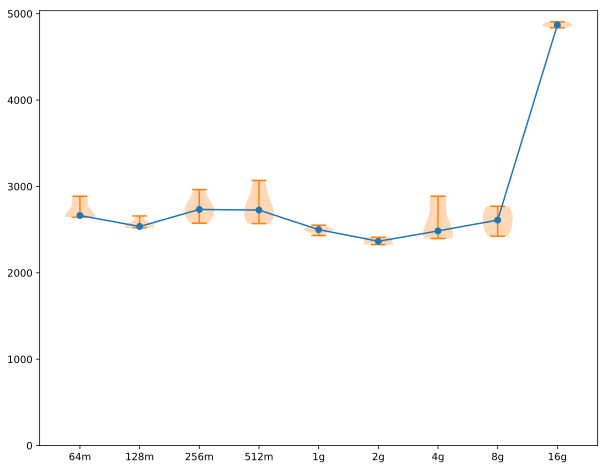

In [12]:
plot_results(tests, res, ticks=short_name)

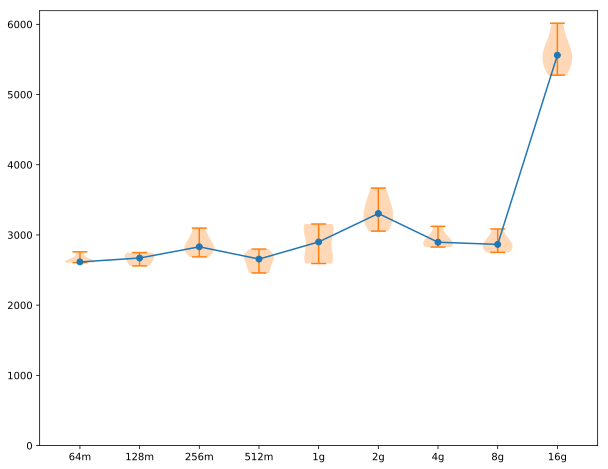

In [11]:
plot_results(tests, res2, ticks=short_name)

In [4]:
run_test('fs_local_seq_64m')

Building...
Running test fs_local_seq_64m for 10 times... Duration: 7.622s


[72674.04895,
 61740.87085,
 66319.643555,
 65946.266724,
 67233.506348,
 70071.065674,
 79136.680664,
 72921.152954,
 64735.728149,
 60960.784302]

In [476]:
ns = map(str, range(1, 21))
res.update(run_tests(*['fs_contention_' + t for t in ns]))

Running test fs_contention_1 for 10 times... Duration: 0.121s
Running test fs_contention_2 for 10 times... Duration: 0.121s
Running test fs_contention_3 for 10 times... Duration: 0.116s
Running test fs_contention_4 for 10 times... Duration: 0.122s
Running test fs_contention_5 for 10 times... Duration: 0.120s
Running test fs_contention_6 for 10 times... Duration: 0.125s
Running test fs_contention_7 for 10 times... Duration: 0.126s
Running test fs_contention_8 for 10 times... Duration: 0.128s
Running test fs_contention_9 for 10 times... Duration: 0.127s
Running test fs_contention_10 for 10 times... Duration: 0.134s
Running test fs_contention_11 for 10 times... Duration: 0.133s
Running test fs_contention_12 for 10 times... Duration: 0.163s
Running test fs_contention_13 for 10 times... Duration: 0.145s
Running test fs_contention_14 for 10 times... Duration: 0.148s
Running test fs_contention_15 for 10 times... Duration: 0.145s
Running test fs_contention_16 for 10 times... Duration: 0.152s
R

In [463]:
run_test('fs_contention_4')

Building...
Running test fs_contention_4 for 10 times... Duration: 0.120s


[120098.164062,
 8756.289062,
 8560.125,
 8606.132812,
 8544.75,
 8716.109375,
 8504.382812,
 8862.132812,
 8748.976562,
 8651.25]

In [481]:
for t in tests:
    res[t] *= 1.1

In [488]:
for i, t in enumerate(tests):
#     print '|', t, '|', 20 * i + 20 ,'µs |',
    print_result(res[t], unit='µs')

median = 22.924 µs, std = 0.955 µs
median = 28.806 µs, std = 0.466 µs
median = 33.154 µs, std = 0.138 µs
median = 38.326 µs, std = 0.114 µs
median = 45.320 µs, std = 0.604 µs
median = 53.474 µs, std = 0.917 µs
median = 62.949 µs, std = 0.408 µs
median = 74.299 µs, std = 0.333 µs
median = 80.234 µs, std = 0.688 µs
median = 88.698 µs, std = 0.905 µs
median = 94.884 µs, std = 1.188 µs
median = 105.150 µs, std = 1.370 µs
median = 109.751 µs, std = 0.881 µs
median = 119.366 µs, std = 1.234 µs
median = 125.208 µs, std = 0.880 µs
median = 131.631 µs, std = 1.746 µs
median = 138.658 µs, std = 1.547 µs
median = 144.247 µs, std = 1.601 µs
median = 149.622 µs, std = 0.321 µs
median = 157.378 µs, std = 1.444 µs


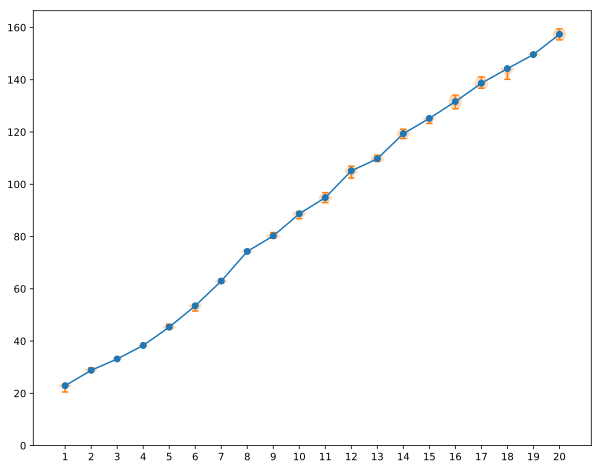

In [483]:
plot_results(tests, res, ticks=ns)
plt.savefig('contention.svg')

In [50]:
run_test('fs_contention_2')

Running test fs_contention_2 for 10 times... Duration: 1.444s


[1185441.84375,
 1731431.046875,
 2190824.03125,
 1347285.210938,
 877702.226562,
 1250462.335938,
 1421798.890625,
 1630552.664062,
 862402.945312,
 670937.1875]

In [167]:
def print_result_cycles(res):
    res = np.array(sorted(res)[2:-2])
    print 'median = {:,.2f} cycles, std = {:,.2f} cycles'.format(np.median(res), np.std(res))

In [349]:
def return_result(res, unit='ms'):
    res = np.array(sorted(res)[2:-2]) / 2.592e6
    if unit == 'µs':
        res *= 1000
    return 'median = {:,.3f} {unit}, std = {:,.3f} {unit}'.format(np.median(res), np.std(res), unit=unit)

In [347]:
def print_result(res, unit='ms'):
    print return_result(res, unit=unit)

In [413]:
def print_bandwidth(res):
    res = 32 / (np.array(sorted(res)[2:-2]) / 2.592e9)
    print 'median = {:,.1f} MB/s, std = {:,.1f} MB/s'.format(np.median(res), np.std(res))

In [414]:
print_bandwidth run_test('tcp_bandwidth_client')

------> print_bandwidth(run_test('tcp_bandwidth_client'))
Building...
Running test tcp_bandwidth_client for 10 times... Duration: 22.301s
median = 15.1 MB/s, std = 0.4 MB/s


In [233]:
print_result run_test('tcp_overhead_teardown')

------> print_result(run_test('tcp_overhead_teardown'))
Running test tcp_overhead_teardown for 10 times... Duration: 0.137s
median = 0.020 ms, std = 0.009 ms


In [185]:
print_result run_test('tcp_overhead_remote_setup')

------> print_result(run_test('tcp_overhead_remote_setup'))
Running test tcp_overhead_remote_setup for 10 times... Duration: 0.172s
median = 3.212 ms, std = 0.465 ms


In [185]:
print_result run_test('tcp_overhead_remote_setup')

------> print_result(run_test('tcp_overhead_remote_setup'))
Running test tcp_overhead_remote_setup for 10 times... Duration: 0.172s
median = 3.212 ms, std = 0.465 ms


In [356]:
print_result run_test('fs_remote_seq_1m')

------> print_result(run_test('fs_remote_seq_1m'))
Building...
Running test fs_remote_seq_1m for 10 times... Duration: 10.165s
median = 3.974 ms, std = 0.348 ms


In [193]:
print_result run_test('fs_remote_rand_1m')

------> print_result(run_test('fs_remote_rand_1m'))
Building...
Running test fs_remote_rand_1m for 10 times... Duration: 22.534s
median = 8.000 ms, std = 1.358 ms


In [434]:
print_result run_test('tcp_rtt_client')

------> print_result(run_test('tcp_rtt_client'))
Running test tcp_rtt_client for 10 times... Duration: 2.060s
median = 2.014 ms, std = 0.882 ms


In [168]:
print_result_cycles([11152.142792,
 10441.846832,
 10938.540894,
 11136.635223,
 10495.096375,
 10640.763458,
 10789.363495,
 10810.794373,
 10689.297882,
 10632.76181])

median = 10,739.33 cycles, std = 108.13 cycles
